Ref: http://docs.momepy.org/en/latest/user_guide/getting_started.html
An introduction to momepy¶

In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
buildings = gpd.read_file(momepy.datasets.get_path('bubenec'),
                          layer='buildings')

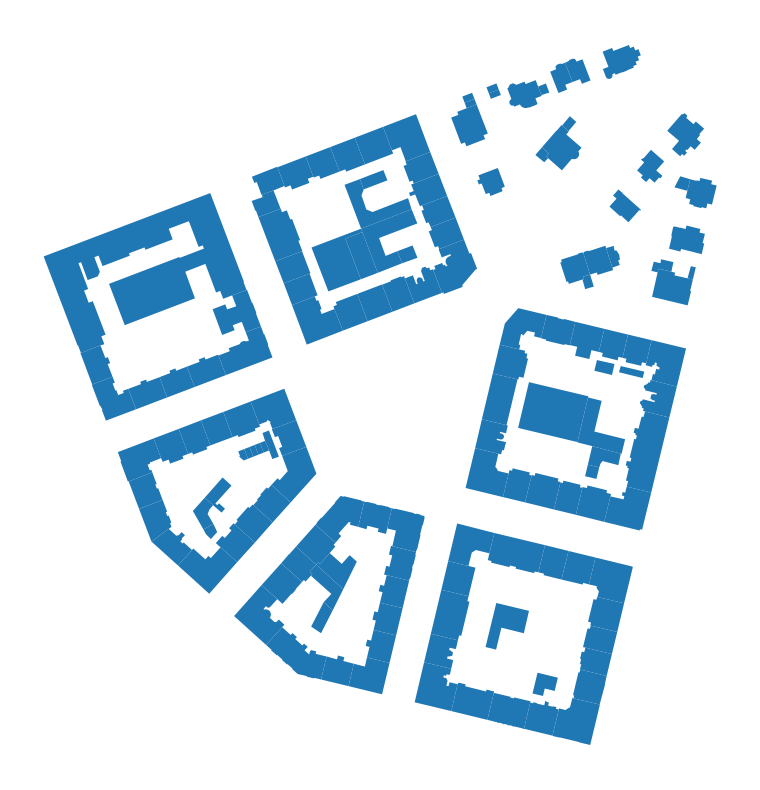

In [3]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [4]:
blg_area = momepy.Area(buildings)
buildings['area'] = blg_area.series

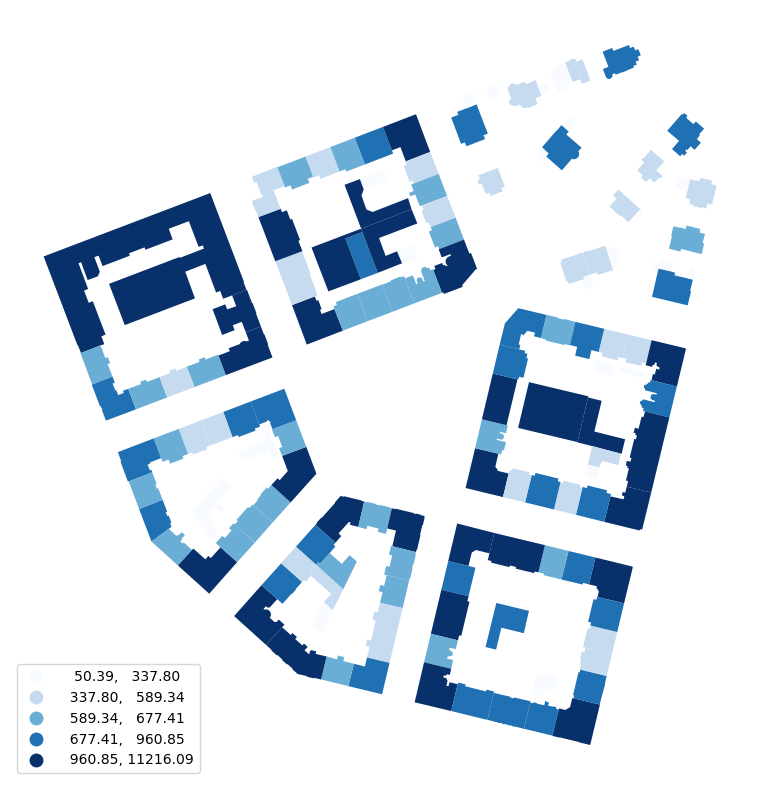

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot('area', ax=ax, legend=True, scheme='quantiles', cmap='Blues',
               legend_kwds={'loc': 'lower left'})
ax.set_axis_off()
plt.show()

In [6]:
blg_area.gdf.head()

,uID,geometry,area
0,1,"POLYGON ((1603599.221 6464369.816, 1603602.984...",728.557495
1,2,"POLYGON ((1603042.880 6464261.498, 1603038.961...",11216.093578
2,3,"POLYGON ((1603044.650 6464178.035, 1603049.192...",641.059515
3,4,"POLYGON ((1603036.557 6464141.467, 1603036.969...",903.746689
4,5,"POLYGON ((1603082.387 6464142.022, 1603081.574...",641.629131


In [7]:
blg_ERI = momepy.EquivalentRectangularIndex(buildings)

In [8]:
blg_ERI = momepy.EquivalentRectangularIndex(buildings, areas='area')
buildings['eri'] = blg_ERI.series

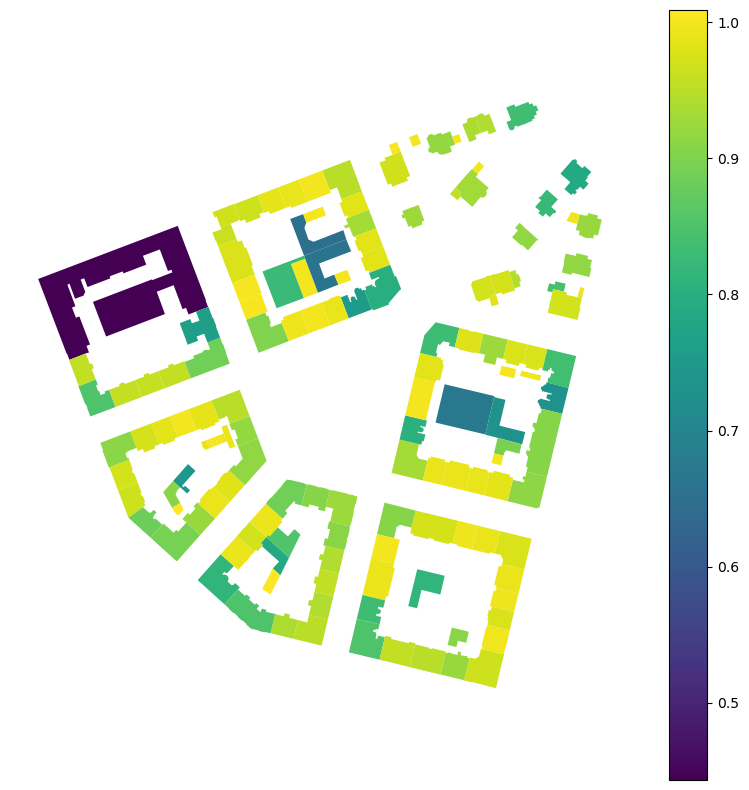

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot('eri', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

In [10]:
blg_ERI.areas.head()

0      728.557495
1    11216.093578
2      641.059515
3      903.746689
4      641.629131
Name: area, dtype: float64

In [11]:
blg_ERI.perimeters.head()

0    137.186310
1    991.345770
2    107.488923
3    141.740042
4    107.158092
dtype: float64

In [12]:
tessellation = gpd.read_file(momepy.datasets.get_path('bubenec'),
                             layer='tessellation')

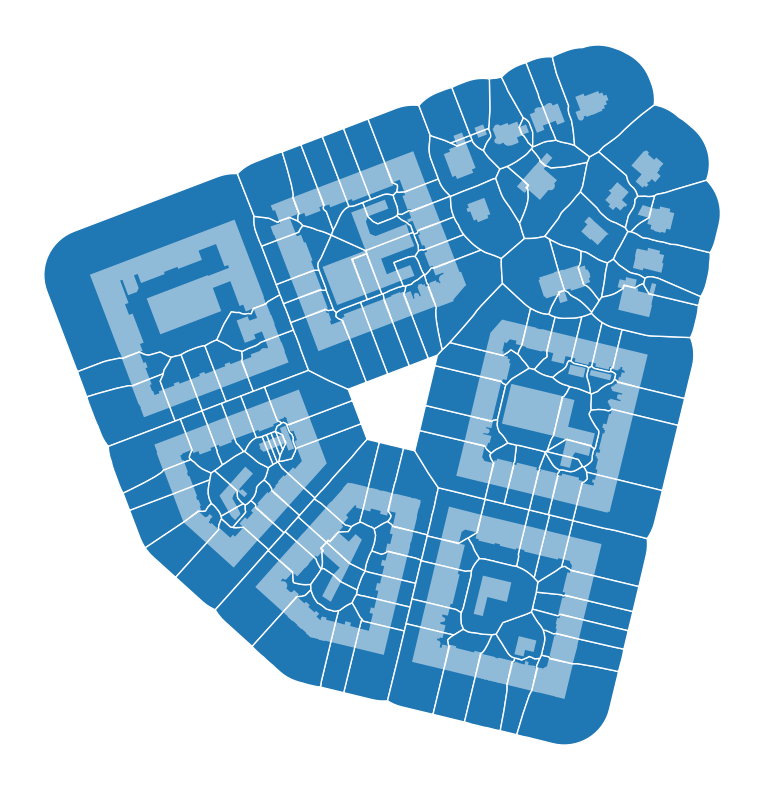

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, edgecolor='white')
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()


In [14]:
coverage = momepy.AreaRatio(tessellation, buildings, left_areas=tessellation.area,
                            right_areas='area', unique_id='uID')
tessellation['CAR'] = coverage.series

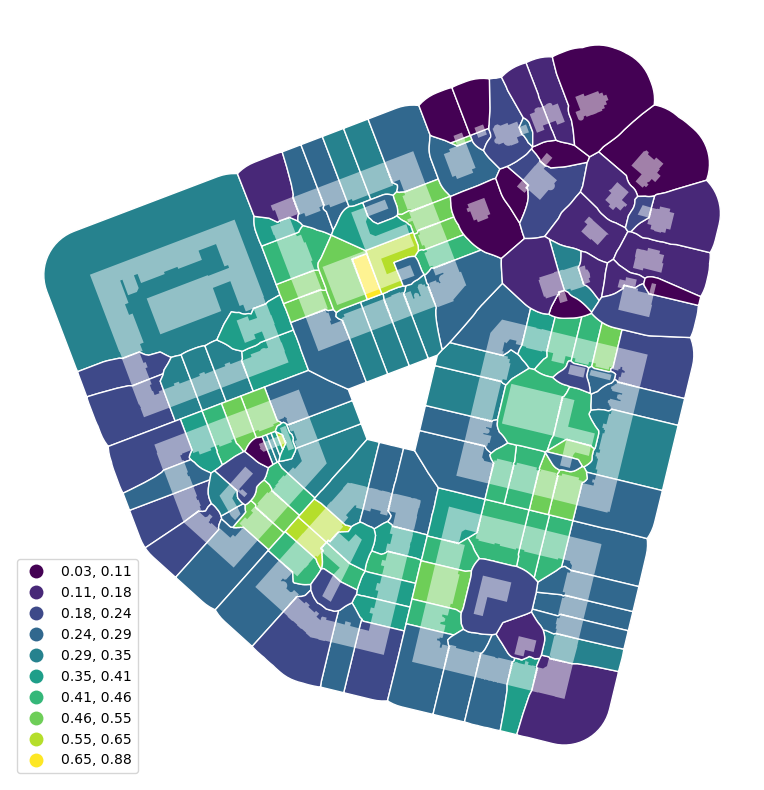

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot('CAR', ax=ax, edgecolor='white', legend=True, scheme='NaturalBreaks', k=10, legend_kwds={'loc': 'lower left'})
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [16]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'),
                        layer='streets')

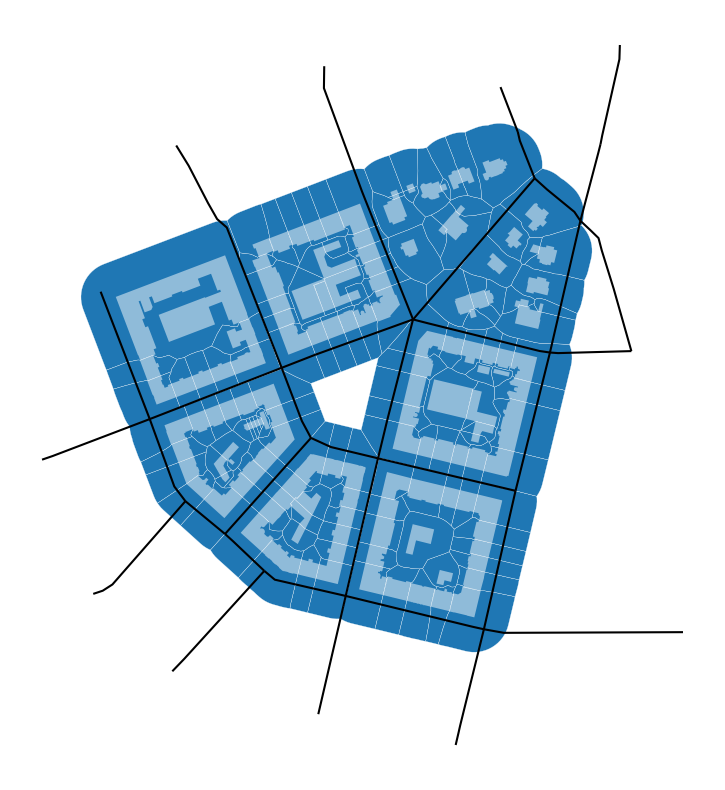

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, edgecolor='white', linewidth=0.2)
buildings.plot(ax=ax, color='white', alpha=.5)
streets.plot(ax=ax, color='black')
ax.set_axis_off()
plt.show()
